# 该notebook完成从推理结果文件夹中的原始数据到segregation结果的全部任务

In [1]:
# 这是未训练的
whole_file_path = '/data2/fanbingbing/Segregation/LLaMA-inference/'
# 在指定数据文件夹下指定原始数据集和整理后数据位置
origin_data_path = whole_file_path+'0511-8B-Instruction/'
save_name = whole_file_path+'demo_0511_predict_flow_01.csv' #多个csv合并为一个 两列
save_compare_name = whole_file_path+'demo_0511_predict_flow_compare.csv' # ['placekey', 'census_block_group', 'predict_flow_01', 'predict_flow','flow', 'flow_01']
save_predict_segregation_df_name = whole_file_path+'demo_0511_predict_segregation.csv'
# result_real_path = '/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia_poi_with_yelp.csv' #这是所有cbg来源的
result_real_path = '/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia2019_segregationindex_includingoneflow_5km.csv' #这是只看5km的

In [1]:
#这是训练之后的
whole_file_path = '/data2/fanbingbing/Segregation/LLaMA-finetuning/inference/'
origin_data_path = whole_file_path+'0511-8B-Instruction/'
save_name = whole_file_path+'0511_predict_flow_01.csv' #多个csv合并为一个 两列
save_compare_name = whole_file_path+'0511_predict_flow_compare.csv' # ['placekey', 'census_block_group', 'predict_flow_01', 'predict_flow','flow', 'flow_01']
save_predict_segregation_df_name = whole_file_path+'0511_predict_segregation.csv' #['placekey', 'predict_flow_01', 'predict_visitor_home','predict_visitor_home_income_level','predict_visitor_home_income_proportion', 'predict_segregation_index']
# result_real_path = '/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia_poi_with_yelp.csv' #这是所有cbg来源的
result_real_path = '/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia2019_segregationindex_includingoneflow_5km.csv' #这是只看5km的


# 改为遍历后缀数字

### 整理文件夹中所有数据

数据格式：placekey+predict_flow_01(字典形式）
下面是demo
上面是所有

In [2]:
import os
import pandas as pd

df_temp = pd.DataFrame()

# 遍历指定路径下的所有文件
for i in range(269):
    # print(i)
    filename = f'judge_result_{i}.csv'
    file_full_path = os.path.join(origin_data_path, filename)
    if os.path.exists(file_full_path):
        # print(f"正在处理文件: {filename}")
        # 读取当前文件到DataFrame中
        df_file = pd.read_csv(file_full_path)
        # 将当前文件的DataFrame追加到df_temp中
        df_temp = pd.concat([df_temp, df_file], ignore_index=True)
    else:
        print(f'file {filename} not found')

print(df_temp.shape)  
df_temp.head()

(5369, 2)


,placekey,predict_flow_01
0,222-222@628-p6z-b8v,"{'421010315011': 1, '421010315012': 0, '421010..."
1,222-222@628-p74-wtv,"{'421010184001': 1, '421010292003': 1, '421010..."
2,222-222@628-p77-2hq,"{'421010314021': 1, '421010314022': 1, '421010..."
3,222-222@628-p7b-hnq,"{'421010310001': 1, '421010313002': 1, '421010..."
4,222-222@628-p7b-rc5,"{'421010310001': 0, '421010314011': 0, '421010..."


In [2]:
import os
import pandas as pd

df_temp = pd.DataFrame()

# 遍历指定路径下的所有文件
for filename in os.listdir(origin_data_path):
# 检查文件扩展名是否为.csv
    if filename.endswith('.csv'):
        # 构建完整的文件路径
        file_full_path = os.path.join(origin_data_path, filename)
        print(f"正在处理文件: {filename}")
        # 读取当前文件到DataFrame中
        df_file = pd.read_csv(file_full_path)
        # 将当前文件的DataFrame追加到df_temp中
        df_temp = pd.concat([df_temp, df_file], ignore_index=True)

print(df_temp.shape)  
df_temp.head()

正在处理文件: judge_result_232.csv
正在处理文件: judge_result_172.csv
正在处理文件: judge_result_31.csv
正在处理文件: judge_result_56.csv
正在处理文件: judge_result_7.csv
正在处理文件: judge_result_106.csv
正在处理文件: judge_result_4.csv
正在处理文件: judge_result_78.csv
正在处理文件: judge_result_173.csv
正在处理文件: judge_result_156.csv
正在处理文件: judge_result_118.csv
正在处理文件: judge_result_51.csv
正在处理文件: judge_result_52.csv
正在处理文件: judge_result_91.csv
正在处理文件: judge_result_229.csv
正在处理文件: judge_result_244.csv
正在处理文件: judge_result_175.csv
正在处理文件: judge_result_167.csv
正在处理文件: judge_result_253.csv
正在处理文件: judge_result_165.csv
正在处理文件: judge_result_179.csv
正在处理文件: judge_result_237.csv
正在处理文件: judge_result_89.csv
正在处理文件: judge_result_254.csv
正在处理文件: judge_result_59.csv
正在处理文件: judge_result_79.csv
正在处理文件: judge_result_182.csv
正在处理文件: judge_result_25.csv
正在处理文件: judge_result_230.csv
正在处理文件: judge_result_268.csv
正在处理文件: judge_result_233.csv
正在处理文件: judge_result_218.csv
正在处理文件: judge_result_130.csv
正在处理文件: judge_result_44.csv
正在处理文件: judge_result_68.csv
正

,placekey,predict_flow_01
0,zzw-223@628-pm9-yjv,"{'421010001001': 0, '421010001002': 1, '421010..."
1,zzw-223@628-pmb-2x5,"{'421010001001': 0, '421010001002': 0, '421010..."
2,zzw-223@628-pmb-5s5,"{'421010001001': 0, '421010001002': 1, '421010..."
3,zzw-223@628-pmb-68v,"{'421010001001': 1, '421010001002': 1, '421010..."
4,zzw-223@628-pmb-6c5,"{'421010001001': 0, '421010001002': 0, '421010..."


In [3]:
df_temp.to_csv(save_name,index=False)
del df_temp

### 得到flow_01对比结果

In [4]:
# 读取真实flow，整理预测flow，并将二者合并
POI_flow_path = '/data2/fanbingbing/Segregation/data/baseline/philadelphia_all_ODpair_predictvsreal.csv'
real_flow_df = pd.read_csv(POI_flow_path,usecols=['placekey', 'census_block_group', 'predict_flow','flow']) #这里的OD没有重复的，验证过了
real_flow_df['flow_01'] = real_flow_df['flow'].apply(lambda x: 1 if x>0 else 0)  #二值化
real_flow_df['census_block_group'] = real_flow_df['census_block_group'].astype(str)  #int64转str
real_flow_df.head()

,placekey,census_block_group,predict_flow,flow,flow_01
0,222-222@628-p6z-b8v,421010315011,23.849152,0.000000,0
1,222-222@628-p6z-b8v,421010315012,22.786348,0.000000,0
2,222-222@628-p6z-b8v,421010315014,23.187072,105.741724,1
3,222-222@628-p6z-b8v,421010315015,24.573077,0.000000,0
4,222-222@628-p6z-b8v,421010315022,21.524259,0.000000,0


In [5]:
# 读取预测的flow_01
result_evaluate_file = save_name
result_evaluate_df = pd.read_csv(result_evaluate_file)

In [6]:
# 得到预测的flow_01展开df
result_evaluate_df['predict_flow_01'] = result_evaluate_df['predict_flow_01'].apply(lambda x:eval(x)) #str转化为dict
temp_list = []
for index,row in result_evaluate_df.iterrows():
    placekey = row['placekey']
    dict = row['predict_flow_01']
    for item,value in dict.items():
        temp_list.append([placekey,item,value])

predict_flow_df = pd.DataFrame(temp_list,columns=['placekey','census_block_group','predict_flow_01'])
print(predict_flow_df.shape) # *3
predict_flow_df.head()

(1627320, 3)


,placekey,census_block_group,predict_flow_01
0,222-222@628-p6z-b8v,421010315011,1
1,222-222@628-p6z-b8v,421010315012,0
2,222-222@628-p6z-b8v,421010315014,1
3,222-222@628-p6z-b8v,421010315015,1
4,222-222@628-p6z-b8v,421010315022,1


In [7]:
#合并real和predict的flow_01
compare_df = pd.merge(predict_flow_df,real_flow_df,on=['placekey','census_block_group'],how='left')
compare_df.to_csv(save_compare_name,index=False)
compare_df.head()

,placekey,census_block_group,predict_flow_01,predict_flow,flow,flow_01
0,222-222@628-p6z-b8v,421010315011,1,23.849152,0.000000,0
1,222-222@628-p6z-b8v,421010315012,0,22.786348,0.000000,0
2,222-222@628-p6z-b8v,421010315014,1,23.187072,105.741724,1
3,222-222@628-p6z-b8v,421010315015,1,24.573077,0.000000,0
4,222-222@628-p6z-b8v,421010315022,1,21.524259,0.000000,0


In [8]:
# 计算分类结指标，绘制混淆矩阵暂时没画

# 计算混淆矩阵
TP = ((compare_df['predict_flow_01'] == 1) & (compare_df['flow_01'] == 1)).sum()
TN = ((compare_df['predict_flow_01'] == 0) & (compare_df['flow_01'] == 0)).sum()
FP = ((compare_df['predict_flow_01'] == 1) & (compare_df['flow_01'] == 0)).sum()
FN = ((compare_df['predict_flow_01'] == 0) & (compare_df['flow_01'] == 1)).sum()

# 计算精确率、召回率和F1分数
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# 打印结果
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {F1:.2f}")

Precision: 0.21
Recall: 0.45
F1 Score: 0.29


### 得到segregation对比结果

In [9]:
#汇总predict_flow，保存到result_evaluate_df的predict_visitor_home列
import tqdm

result_evaluate_df['predict_visitor_home'] = None
for index, row in tqdm.tqdm(result_evaluate_df.iterrows()):
    placekey = row['placekey']
    filtered_rows = compare_df[compare_df['placekey'] == placekey]
    
    # 初始化一个空字典来保存键值对
    predict_visitor_home_dict = {}
    for _, compare_row in filtered_rows.iterrows():
        # 如果predict_flow_01是1
        if compare_row['predict_flow_01'] == 1:
            # 形成键值对，键是census_block_group，值是predict_flow
            predict_visitor_home_dict[compare_row['census_block_group']] = compare_row['predict_flow']
    
    # 将得到的字典保存到result_evaluate_df的predict_visitor_home列
    result_evaluate_df.at[index, 'predict_visitor_home'] = predict_visitor_home_dict

result_evaluate_df.head()

5369it [06:30, 13.74it/s]


,placekey,predict_flow_01,predict_visitor_home
0,222-222@628-p6z-b8v,"{'421010315011': 1, '421010315012': 0, '421010...","{'421010315011': 23.849151656658268, '42101031..."
1,222-222@628-p74-wtv,"{'421010184001': 1, '421010292003': 1, '421010...","{'421010184001': 32.80524735981318, '421010292..."
2,222-222@628-p77-2hq,"{'421010314021': 1, '421010314022': 1, '421010...","{'421010314021': 19.48355728058388, '421010314..."
3,222-222@628-p7b-hnq,"{'421010310001': 1, '421010313002': 1, '421010...","{'421010310001': 22.0217422532058, '4210103130..."
4,222-222@628-p7b-rc5,"{'421010310001': 0, '421010314011': 0, '421010...","{'421010332002': 20.1754025386224, '4210103330..."


In [10]:
import numpy as np
specific_features=pd.read_csv('/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia_cbg_features.csv',usecols=['census_block_group','average_income_group'])

def update_dict(row):
    new_dict = row['predict_visitor_home'].copy() # 要加copy否则会同时修改
    for key, value in new_dict.items():
        if int(key) in specific_features['census_block_group'].values:
            new_dict[key] = specific_features.loc[specific_features['census_block_group'] == int(key), 'average_income_group'].values[0]
        else:
            new_dict[key] = np.nan
    return new_dict

result_evaluate_df['predict_visitor_home_income_level'] = result_evaluate_df.apply(lambda row:update_dict(row), axis=1)
result_evaluate_df.head()

,placekey,predict_flow_01,predict_visitor_home,predict_visitor_home_income_level
0,222-222@628-p6z-b8v,"{'421010315011': 1, '421010315012': 0, '421010...","{'421010315011': 23.849151656658268, '42101031...","{'421010315011': 1.0, '421010315014': 3.0, '42..."
1,222-222@628-p74-wtv,"{'421010184001': 1, '421010292003': 1, '421010...","{'421010184001': 32.80524735981318, '421010292...","{'421010184001': 3.0, '421010292003': 3.0, '42..."
2,222-222@628-p77-2hq,"{'421010314021': 1, '421010314022': 1, '421010...","{'421010314021': 19.48355728058388, '421010314...","{'421010314021': 1.0, '421010314022': 0.0, '42..."
3,222-222@628-p7b-hnq,"{'421010310001': 1, '421010313002': 1, '421010...","{'421010310001': 22.0217422532058, '4210103130...","{'421010310001': 2.0, '421010313002': 2.0, '42..."
4,222-222@628-p7b-rc5,"{'421010310001': 0, '421010314011': 0, '421010...","{'421010332002': 20.1754025386224, '4210103330...","{'421010332002': 3.0, '421010333001': 1.0, '42..."


In [11]:
# 将visitor_home_cbg_income_level中相同level的visitor人数求和
# 保存在visitor_home_cbg_income_proportion中
import math

def calculate_total_people(row):
    # print(row.name)
    income_level = row['predict_visitor_home_income_level']
    visitor_number = row['predict_visitor_home']
    people_sum = {'sum': 0,'level_0':0,'level_1':0,'level_2':0,'level_3':0}
    people_sum_keys_list = list(people_sum.keys())
    
    for keyl, valuel in income_level.items():
        if not math.isnan(valuel):  #如果，先计算总数，然后对应类别加人数
            for keyn, valuen in visitor_number.items():
                if keyn == keyl:  # 这里假设将满足特定条件的键为'sum'的值相加
                    people_sum['sum'] += valuen
                    people_sum[people_sum_keys_list[int(valuel)+1]] += valuen
    return people_sum

result_evaluate_df['predict_visitor_home_income_proportion'] = result_evaluate_df.apply(calculate_total_people, axis=1)
result_evaluate_df.head()

,placekey,predict_flow_01,predict_visitor_home,predict_visitor_home_income_level,predict_visitor_home_income_proportion
0,222-222@628-p6z-b8v,"{'421010315011': 1, '421010315012': 0, '421010...","{'421010315011': 23.849151656658268, '42101031...","{'421010315011': 1.0, '421010315014': 3.0, '42...","{'sum': 1275.7080249327357, 'level_0': 50.3266..."
1,222-222@628-p74-wtv,"{'421010184001': 1, '421010292003': 1, '421010...","{'421010184001': 32.80524735981318, '421010292...","{'421010184001': 3.0, '421010292003': 3.0, '42...","{'sum': 7542.770148865367, 'level_0': 1032.261..."
2,222-222@628-p77-2hq,"{'421010314021': 1, '421010314022': 1, '421010...","{'421010314021': 19.48355728058388, '421010314...","{'421010314021': 1.0, '421010314022': 0.0, '42...","{'sum': 1637.9441452976662, 'level_0': 72.7732..."
3,222-222@628-p7b-hnq,"{'421010310001': 1, '421010313002': 1, '421010...","{'421010310001': 22.0217422532058, '4210103130...","{'421010310001': 2.0, '421010313002': 2.0, '42...","{'sum': 2879.0579546157483, 'level_0': 131.504..."
4,222-222@628-p7b-rc5,"{'421010310001': 0, '421010314011': 0, '421010...","{'421010332002': 20.1754025386224, '4210103330...","{'421010332002': 3.0, '421010333001': 1.0, '42...","{'sum': 1202.433542641224, 'level_0': 28.12690..."


In [12]:
 # 计算segregation_index : 2/3* (sum of |por_1234 - 0.25|)
def calculate_segregation_index(row):
    people_sum = row['predict_visitor_home_income_proportion']
    people_sum_keys_list = list(people_sum.keys())
    segregation_index = float(0)
    sumnumber = people_sum[people_sum_keys_list[0]]
    if sumnumber != 0: #因为有缺失的
        for key_index in range(1, len(people_sum_keys_list)):  # 从第二个键值开始遍历
            key = people_sum_keys_list[key_index]
            value = people_sum[key]
            segregation_index += abs(value/sumnumber-0.25)
        segregation_index *= 2/3
    else:
        segregation_index = np.nan
    return segregation_index


result_evaluate_df['predict_segregation_index'] = result_evaluate_df.apply(calculate_segregation_index,axis=1)
result_evaluate_df.head()

,placekey,predict_flow_01,predict_visitor_home,predict_visitor_home_income_level,predict_visitor_home_income_proportion,predict_segregation_index
0,222-222@628-p6z-b8v,"{'421010315011': 1, '421010315012': 0, '421010...","{'421010315011': 23.849151656658268, '42101031...","{'421010315011': 1.0, '421010315014': 3.0, '42...","{'sum': 1275.7080249327357, 'level_0': 50.3266...",0.282276
1,222-222@628-p74-wtv,"{'421010184001': 1, '421010292003': 1, '421010...","{'421010184001': 32.80524735981318, '421010292...","{'421010184001': 3.0, '421010292003': 3.0, '42...","{'sum': 7542.770148865367, 'level_0': 1032.261...",0.274685
2,222-222@628-p77-2hq,"{'421010314021': 1, '421010314022': 1, '421010...","{'421010314021': 19.48355728058388, '421010314...","{'421010314021': 1.0, '421010314022': 0.0, '42...","{'sum': 1637.9441452976662, 'level_0': 72.7732...",0.286343
3,222-222@628-p7b-hnq,"{'421010310001': 1, '421010313002': 1, '421010...","{'421010310001': 22.0217422532058, '4210103130...","{'421010310001': 2.0, '421010313002': 2.0, '42...","{'sum': 2879.0579546157483, 'level_0': 131.504...",0.395577
4,222-222@628-p7b-rc5,"{'421010310001': 0, '421010314011': 0, '421010...","{'421010332002': 20.1754025386224, '4210103330...","{'421010332002': 3.0, '421010333001': 1.0, '42...","{'sum': 1202.433542641224, 'level_0': 28.12690...",0.522178


In [13]:
print(result_evaluate_df.columns)
result_evaluate_df.to_csv(save_predict_segregation_df_name,index = False)

Index(['placekey', 'predict_flow_01', 'predict_visitor_home',
       'predict_visitor_home_income_level',
       'predict_visitor_home_income_proportion', 'predict_segregation_index'],
      dtype='object')


# 分析segregation结果

In [14]:
# 绘制预测结果对比
result_real_df = pd.read_csv(result_real_path,usecols=['placekey','segregation_index'])
print('real POI number： ',result_real_df.shape[0])
result_evaluate_df = pd.read_csv(save_predict_segregation_df_name,usecols=['placekey','predict_segregation_index'])
print('predict POI number： ',result_evaluate_df.shape[0])

result_df = pd.merge(result_real_df,result_evaluate_df,on='placekey',how='inner')
result_df = result_df.dropna(subset=['segregation_index', 'predict_segregation_index'])
print('merge POI number: ',result_df.shape[0])

result_df.head()

real POI number：  5359
predict POI number：  5369
merge POI number:  5368


,placekey,segregation_index,predict_segregation_index
0,222-222@628-p9p-649,0.522749,0.477396
1,222-222@628-pmf-8vz,0.302084,0.155135
2,222-223@628-pmf-hkf,0.391451,0.327259
3,223-222@628-pgf-2zf,0.231533,0.139607
4,224-223@628-pmf-s89,0.592439,0.399415


In [15]:
# 设置直方图的边界
act_range = 1
predict_range = 1
act_bins = np.linspace(0,act_range, 51)  # 从0到10，分成100段
predict_bins = np.linspace(0, predict_range, 51)   # 从0到1，分成100段

# 计算二维直方图
histogram, xedges, yedges = np.histogram2d(
    result_df['segregation_index'], result_df['predict_segregation_index'], bins=[act_bins, predict_bins],range=[[0,act_range],[0,predict_range]])

# 归一化直方图，得到每个小格的概率密度
histogram_normalized = histogram / histogram.sum()
assert np.isclose(histogram_normalized.sum(), 1.)

In [16]:
# 计算每个segregation区间内merged_df['predict_segregation_index']的平均值
mean_diffs = []
for i in range(len(act_bins) - 1):
    # 找到落入当前箱子的merged_df['segregation_index']的元素
    mask = (result_df['segregation_index'] >= act_bins[i]) & (result_df['segregation_index'] < act_bins[i + 1])
    # 计算当前箱子内merged_df['predict_segregation_index']的平均值
    if np.any(mask):  # 确保当前箱子内有数据点
        mean_diffs.append(np.mean(result_df['predict_segregation_index'][mask]))
    else:
        mean_diffs.append(np.nan)  # 如果当前箱子内没有数据点，则使用NaN

# 将计算得到的平均值列表转换为NumPy数组
mean_diffs = np.array(mean_diffs)

# 创建一个用于插值的细致x轴数组
interp_x = np.linspace(act_bins[0], act_bins[-1], 500)
# 插值计算平均值对应的y坐标
interp_y = np.interp(interp_x, act_bins[:-1], mean_diffs)

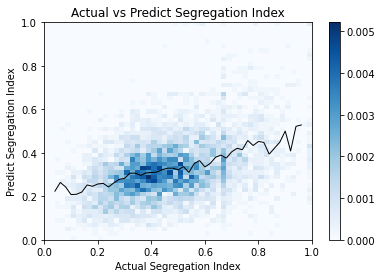

In [17]:
import matplotlib.pyplot as plt

# 绘制热力图
plt.imshow(histogram_normalized.T, origin='lower', extent=(0, act_range,  0, predict_range),
           cmap='Blues', aspect='auto', interpolation='nearest')
# 绘制平均值线
plt.plot(interp_x, interp_y, color='black', linewidth=1)

# 添加颜色条
cbar = plt.colorbar()
# 添加标题和轴标签
plt.title('Actual vs Predict Segregation Index')
plt.xlabel('Actual Segregation Index')
plt.ylabel('Predict Segregation Index')

# 显示图形
plt.show()

In [18]:
import pandas as pd
from scipy.stats import linregress

# 假设merged_df是一个已经存在的DataFrame，并且它包含'segregation_index'和'predict_segregation_index'两列。

# 提取两列数据作为一维数组
y_true = result_df['segregation_index'].values
y_pred = result_df['predict_segregation_index'].values

# 使用scipy的linregress函数来计算R-square
slope, intercept, r_value, p_value, std_err = linregress(y_true, y_pred)

# R-square的值就是r_value的平方
r_square = r_value**2

print(f'R-square: {r_square}')



# 计算每个预测值与真实值之间的差的平方
squared_differences = (y_true - y_pred) ** 2
# 计算所有差的平方的平均值
mean_squared_error = np.mean(squared_differences)
# 计算RMSE
rmse = np.sqrt(mean_squared_error)
print(f'RMSE: {rmse}')

R-square: 0.15454794504210778
RMSE: 0.2265539194824656


 - computing KDE in spherical coordinates


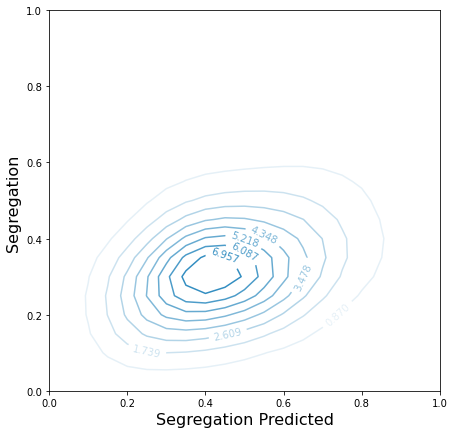

In [19]:
# 绘制等高线图
from sklearn.neighbors import KernelDensity
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

newred = np.array([[0.0, 0.4470588235294118, 0.6980392156862745, ind/10] for ind in range(10)])
newcmp = ListedColormap(newred) #自定义颜色映射（改为蓝色）

test_data = np.array(result_df[['predict_segregation_index', 'segregation_index']].values)

# # Set up the data grid for the contour plot
X, Y = np.meshgrid(np.arange(0,1.05,0.05), np.arange(0,1.05,0.05))
xy = np.vstack([Y.ravel(), X.ravel()]).T

# Plot map of South America with distributions of each species
fig = plt.figure(figsize=(7, 7),facecolor='white')
ax = fig.add_subplot(111)

# construct a kernel density estimate of the distribution
print(" - computing KDE in spherical coordinates")
kde = KernelDensity(bandwidth=0.06, metric="haversine", kernel="gaussian", algorithm="ball_tree")
kde.fit(test_data)

# # evaluate only on the land: -9999 indicates ocean
Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

# plot contours of the density
levels = np.linspace(0, Z.max(), 10)

handle = plt.contour(X, Y, Z, levels=levels, cmap=newcmp)
ax.clabel(handle, inline=True, fontsize=10)
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('Segregation Predicted',fontsize=16)
plt.ylabel('Segregation ',fontsize=16)

plt.show()


# 使用5km 内计算real index (运行一次就行)

In [98]:
specific_poi_dfs = pd.read_csv('/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia2019_segregationindex_includingoneflow.csv',usecols=['placekey','visitor_home_cbgs'])
result_real_df = pd.read_csv('/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia_poi_with_yelp.csv',usecols=['placekey'])
specific_poi_dfs = specific_poi_dfs[specific_poi_dfs['placekey'].isin (real_flow_df['placekey'])].reset_index(drop=True)
print(specific_poi_dfs.shape)
specific_poi_dfs.head()

(5359, 2)


,placekey,visitor_home_cbgs
0,222-222@628-p9p-649,"{'421010349004': 59.30834518831, '421010363031..."
1,222-222@628-pmf-8vz,"{'421010369003': 2061.1555297143886, '42101008..."
2,222-223@628-pmf-hkf,"{'421010137001': 233.87777701232244, '42101014..."
3,223-222@628-pgf-2zf,"{'421010369001': 2701.01593703775, '4210101100..."
4,224-223@628-pmf-s89,"{'421010201021': 67.08450729520119, '421010028..."


In [53]:
POI_flow_path = '/data2/fanbingbing/Segregation/data/baseline/philadelphia_all_ODpair_predictvsreal.csv'
real_flow_df = pd.read_csv(POI_flow_path,usecols=['placekey', 'census_block_group'])
real_flow_df.head()

,placekey,census_block_group
0,222-222@628-p6z-b8v,421010315011
1,222-222@628-p6z-b8v,421010315012
2,222-222@628-p6z-b8v,421010315014
3,222-222@628-p6z-b8v,421010315015
4,222-222@628-p6z-b8v,421010315022


In [54]:
import json
specific_features=pd.read_csv('/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia_cbg_features.csv',usecols=['census_block_group','average_income_group'])

def update_dict(row):
    new_dict = row['visitor_home_cbgs'].copy() # 要加copy否则会同时修改
    cbg_list = real_flow_df[real_flow_df['placekey']==row['placekey']].census_block_group
    # print(cbg_list)
    for key, value in new_dict.items():
        if int(key) in cbg_list.values:
            new_dict[key] = specific_features.loc[specific_features['census_block_group'] == int(key), 'average_income_group'].values[0]
        else:
            new_dict[key] = np.nan
    return new_dict

specific_poi_dfs['visitor_home_cbgs'] = specific_poi_dfs.visitor_home_cbgs.map(lambda x:eval(x))
specific_poi_dfs['visitor_home_cbgs_income_level'] = specific_poi_dfs.apply(lambda row:update_dict(row), axis=1)

specific_poi_dfs.head()

,placekey,visitor_home_cbgs,visitor_home_cbgs_income_level
0,222-222@628-p9p-649,"{'421010349004': 59.30834518831, '421010363031...","{'421010349004': nan, '421010363031': nan, '42..."
1,222-222@628-pmf-8vz,"{'421010369003': 2061.1555297143886, '42101008...","{'421010369003': 3.0, '421010088023': 0.0, '42..."
2,222-223@628-pmf-hkf,"{'421010137001': 233.87777701232244, '42101014...","{'421010137001': 2.0, '421010146001': 1.0, '42..."
3,223-222@628-pgf-2zf,"{'421010369001': 2701.01593703775, '4210101100...","{'421010369001': 1.5, '421010110001': 2.0, '42..."
4,224-223@628-pmf-s89,"{'421010201021': 67.08450729520119, '421010028...","{'421010201021': nan, '421010028013': 3.0, '42..."


In [55]:
# 将visitor_home_cbg_income_level中相同level的visitor人数求和
# 保存在visitor_home_cbg_income_proportion中
def calculate_total_people(row):
    # print(row.name)
    income_level = row['visitor_home_cbgs_income_level']
    visitor_number = row['visitor_home_cbgs']
    people_sum = {'sum': 0,'level_0':0,'level_1':0,'level_2':0,'level_3':0}
    people_sum_keys_list = list(people_sum.keys())
    
    for keyl, valuel in income_level.items():
        if not math.isnan(valuel):  #如果，先计算总数，然后对应类别加人数
            for keyn, valuen in visitor_number.items():
                if keyn == keyl:  # 这里假设将满足特定条件的键为'sum'的值相加
                    people_sum['sum'] += valuen
                    people_sum[people_sum_keys_list[int(valuel)+1]] += valuen
    return people_sum

specific_poi_dfs['visitor_home_cbgs_income_proportion'] = specific_poi_dfs.apply(calculate_total_people, axis=1)
specific_poi_dfs.head()

,placekey,visitor_home_cbgs,visitor_home_cbgs_income_level,visitor_home_cbgs_income_proportion
0,222-222@628-p9p-649,"{'421010349004': 59.30834518831, '421010363031...","{'421010349004': nan, '421010363031': nan, '42...","{'sum': 5355.577721177871, 'level_0': 0, 'leve..."
1,222-222@628-pmf-8vz,"{'421010369003': 2061.1555297143886, '42101008...","{'421010369003': 3.0, '421010088023': 0.0, '42...","{'sum': 12332.588238077415, 'level_0': 4623.09..."
2,222-223@628-pmf-hkf,"{'421010137001': 233.87777701232244, '42101014...","{'421010137001': 2.0, '421010146001': 1.0, '42...","{'sum': 14829.051938950599, 'level_0': 2699.30..."
3,223-222@628-pgf-2zf,"{'421010369001': 2701.01593703775, '4210101100...","{'421010369001': 1.5, '421010110001': 2.0, '42...","{'sum': 31697.22835927147, 'level_0': 10354.26..."
4,224-223@628-pmf-s89,"{'421010201021': 67.08450729520119, '421010028...","{'421010201021': nan, '421010028013': 3.0, '42...","{'sum': 11481.623601818981, 'level_0': 984.478..."


In [56]:
# 计算segregation_index : 2/3* (sum of |por_1234 - 0.25|)
def calculate_segregation_index(row):
    people_sum = row['visitor_home_cbgs_income_proportion']
    people_sum_keys_list = list(people_sum.keys())
    segregation_index = float(0)
    sumnumber = people_sum[people_sum_keys_list[0]]
    if sumnumber != 0: #因为有缺失的
        for key_index in range(1, len(people_sum_keys_list)):  # 从第二个键值开始遍历
            key = people_sum_keys_list[key_index]
            value = people_sum[key]
            segregation_index += abs(value/sumnumber-0.25)
        segregation_index *= 2/3
    else:
        segregation_index = np.nan
    return segregation_index


specific_poi_dfs['segregation_index'] = specific_poi_dfs.apply(calculate_segregation_index,axis=1)
specific_poi_dfs.head()

,placekey,visitor_home_cbgs,visitor_home_cbgs_income_level,visitor_home_cbgs_income_proportion,segregation_index
0,222-222@628-p9p-649,"{'421010349004': 59.30834518831, '421010363031...","{'421010349004': nan, '421010363031': nan, '42...","{'sum': 5355.577721177871, 'level_0': 0, 'leve...",0.522749
1,222-222@628-pmf-8vz,"{'421010369003': 2061.1555297143886, '42101008...","{'421010369003': 3.0, '421010088023': 0.0, '42...","{'sum': 12332.588238077415, 'level_0': 4623.09...",0.302084
2,222-223@628-pmf-hkf,"{'421010137001': 233.87777701232244, '42101014...","{'421010137001': 2.0, '421010146001': 1.0, '42...","{'sum': 14829.051938950599, 'level_0': 2699.30...",0.391451
3,223-222@628-pgf-2zf,"{'421010369001': 2701.01593703775, '4210101100...","{'421010369001': 1.5, '421010110001': 2.0, '42...","{'sum': 31697.22835927147, 'level_0': 10354.26...",0.231533
4,224-223@628-pmf-s89,"{'421010201021': 67.08450729520119, '421010028...","{'421010201021': nan, '421010028013': 3.0, '42...","{'sum': 11481.623601818981, 'level_0': 984.478...",0.592439
...,...,...,...,...,...
5354,222-222@628-p8f-435,"{'421010191002': 232.63333359156871, '42101018...","{'421010191002': 2.0, '421010188005': 1.0, '42...","{'sum': 852.988889835752, 'level_0': 0, 'level...",0.515152
5355,222-222@628-pm4-xh5,"{'421010024005': 150.63657645642252, '42101003...","{'421010024005': 3.0, '421010031005': 1.0, '42...","{'sum': 1743.080384710031, 'level_0': 279.7536...",0.242798
5356,222-222@628-pmb-x5z,"{'421010102003': 135.30889173230764, '42101003...","{'421010102003': nan, '421010033004': 0.0, '42...","{'sum': 947.1622421261535, 'level_0': 270.6177...",0.476190
5357,222-224@628-pmc-n89,"{'421010070002': 68.17160261486313, '421010144...","{'421010070002': nan, '421010144003': 2.0, '42...","{'sum': 204.5148078445894, 'level_0': 0, 'leve...",0.666667


In [57]:
specific_poi_dfs.to_csv('/data2/fanbingbing/Segregation/data/Segregation/philadelphia/philadelphia2019_segregationindex_includingoneflow_5km.csv',index=False)